In [1]:
# Import Essential libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from textblob import TextBlob
from geopy.geocoders import Nominatim
import re
from geopy.extra.rate_limiter import RateLimiter
import warnings

In [2]:
# Ignore specific warnings
warnings.simplefilter(action='ignore', category=pd.errors.DtypeWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)


# Task 2.1: Load and Process Data    


In [3]:
# Import tweets from file
btc_data = pd.read_csv("Dataset/Bitcoin_tweets.csv")
btc_data = btc_data.dropna()
btc_data = btc_data.sample(n=500)


In [4]:
# Function to clean special characters from tweets
def clean_tweet_data(text):
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return cleaned_text


In [5]:
# Apply the clean_tweet_data function to the 'text' column
btc_data['cleaned_text'] = btc_data['text'].apply(clean_tweet_data)



Initially, data is collected, from which a random set after which 500 records is chosen and then cleaned.

# Task 2.2: Geo Encoding


In [17]:
# Task 2.2: Geo Encoding
geolocator = Nominatim(user_agent="mw")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
btc_data['user_location'] = btc_data['user_location'].apply(geocode)
btc_data['Latitude'] = btc_data['user_location'].apply(lambda x: x.latitude if x else None)
btc_data['Longitude'] = btc_data['user_location'].apply(lambda x: x.longitude if x else None)


Geocoding is carried out to obtain the specific longitude and latitude coordinates for the data points.

# Task 2.3: Analyze Polarity

In [18]:
def determine_polarity(text):
    return TextBlob(str(text)).sentiment.polarity


In [19]:
# Apply the determine_polarity function to the 'cleaned_text' column
btc_data['polarity'] = btc_data['cleaned_text'].apply(determine_polarity)


In [20]:
# Display DataFrame with polarity scores
print("Cleaned tweets along with their associated polarity:")
print(btc_data[['cleaned_text', 'polarity']])


Cleaned tweets along with their associated polarity:
                                              cleaned_text  polarity
3447444  Berzerker found bitcoin in a Blue vault at thi...  0.500000
2853667             rocketcrypto PERFECT\n \nbtc\nbnb\neth  1.000000
1593358  denimdannnnn Buy bitcoin and forget it for 10 ...  0.500000
3519477  May 31 2022 082900 UTC  3165290  2945600  2510...  0.000000
2754     Thought experiment If in 2025 we have 1 billio... -0.150000
...                                                    ...       ...
1679509  Just tell me who did this to you \nWas it Bobb...  0.016667
2150900  you are so funny when bitcoin is above you wai... -0.116667
3286542                 Bitcoin CANT afford to lose 28 000  0.000000
2585269    Probably nothing Bitcoin \n\nhttpstcobbbo742qPK  0.000000
1948600  btc crypto defi cryptotrading \n\nThis graph s... -0.037500

[500 rows x 2 columns]


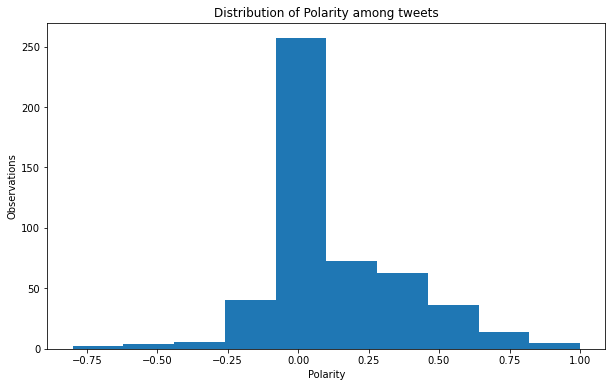

In [21]:
# Plot polarity histogram
plt.figure(figsize=(10, 6))
plt.hist(btc_data['polarity'])
plt.title('Distribution of Polarity among tweets')
plt.xlabel('Polarity')
plt.ylabel('Observations')
plt.show()


There's a prominent concentration of tweets that have sentiments that are either neutral or mildly negative. Conversely, positive sentiment tweets appear in smaller numbers, and tweets with very negative sentiments are comparatively scarce.

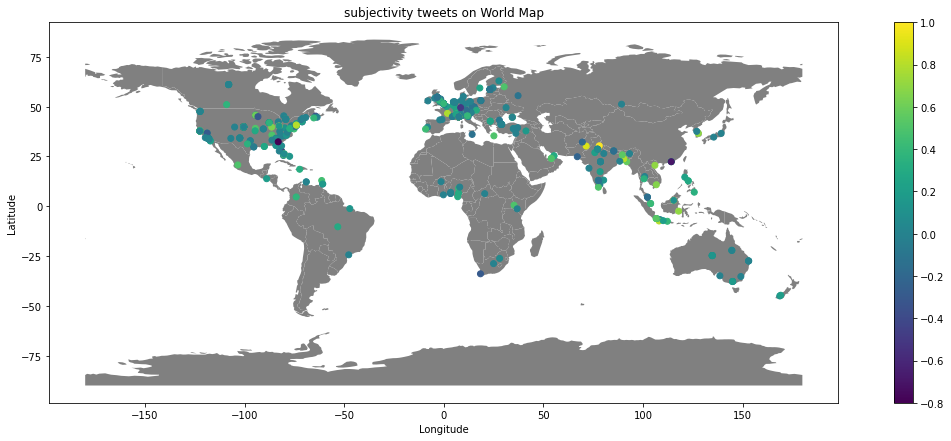

In [27]:
# Create a GeoDataFrame from the DataFrame
gdf = gpd.GeoDataFrame(btc_data, geometry=gpd.points_from_xy(btc_data['Longitude'], btc_data['Latitude']))

# Plotting the world map
worlds = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = worlds.plot(figsize=(20, 7),facecolor='gray')

# Plotting the points with subjectivity values
gdf.plot(column='polarity',ax=ax,  legend= True)

# Adding labels and title
plt.title('subjectivity tweets on World Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

This shows that the dataset has most of the tweets having positive polarity

# Task 2.4: Analyze Subjectivity

In [22]:
# Task 2.4: Analyze Subjectivity
def measure_subjectivity(text):
    return TextBlob(str(text)).sentiment.subjectivity


In [23]:
# Apply the measure_subjectivity function to the 'cleaned_text' column
btc_data['subjectivity'] = btc_data['cleaned_text'].apply(measure_subjectivity)


In [24]:
# Display DataFrame with subjectivity scores
print("Cleaned tweets along with their associated subjectivity:")
print(btc_data[['cleaned_text', 'subjectivity']])


Cleaned tweets along with their associated subjectivity:
                                              cleaned_text  subjectivity
3447444  Berzerker found bitcoin in a Blue vault at thi...      0.550000
2853667             rocketcrypto PERFECT\n \nbtc\nbnb\neth      1.000000
1593358  denimdannnnn Buy bitcoin and forget it for 10 ...      0.500000
3519477  May 31 2022 082900 UTC  3165290  2945600  2510...      0.000000
2754     Thought experiment If in 2025 we have 1 billio...      0.400000
...                                                    ...           ...
1679509  Just tell me who did this to you \nWas it Bobb...      0.400000
2150900  you are so funny when bitcoin is above you wai...      0.666667
3286542                 Bitcoin CANT afford to lose 28 000      0.000000
2585269    Probably nothing Bitcoin \n\nhttpstcobbbo742qPK      0.000000
1948600  btc crypto defi cryptotrading \n\nThis graph s...      0.412500

[500 rows x 2 columns]


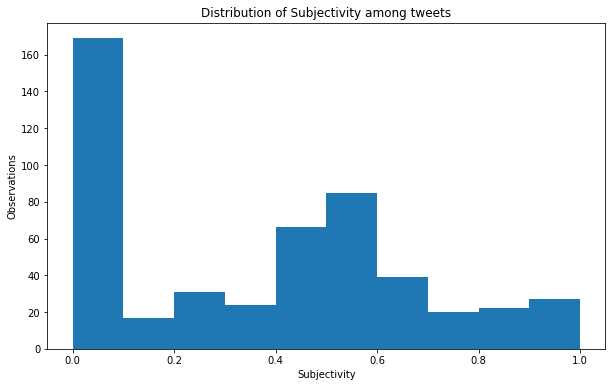

In [25]:
# Plot subjectivity histogram
plt.figure(figsize=(10, 6))
plt.hist(btc_data['subjectivity'])
plt.title('Distribution of Subjectivity among tweets')
plt.xlabel('Subjectivity')
plt.ylabel('Observations')
plt.show()


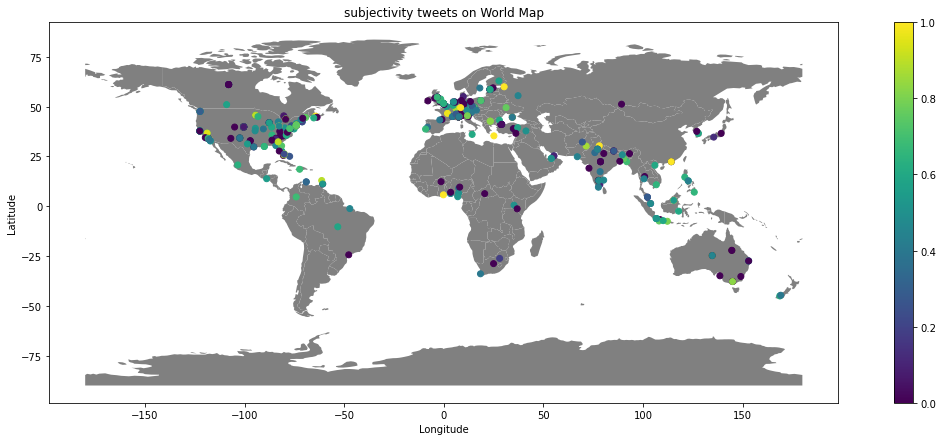

In [26]:
# Create a GeoDataFrame from the DataFrame
gdf = gpd.GeoDataFrame(btc_data, geometry=gpd.points_from_xy(btc_data['Longitude'], btc_data['Latitude']))

# Plotting the world map
worlds = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = worlds.plot(figsize=(20, 7),facecolor='gray')

# Plotting the points with subjectivity values
gdf.plot(column='subjectivity',ax=ax,  legend= True)

# Adding labels and title
plt.title('subjectivity tweets on World Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

On the map, the density of tweets from various areas is represented by dots, where darker shades illustrate more objective subjectivity and lighter shades denote more emotional subjectivity having precise location.

# Task 2.5: Storify


The nuanced examination of public sentiment regarding cryptocurrencies in the United Kingdom has unveiled a diverse panorama of perspectives, where optimism and skepticism coexist. Delving into the dataset reveals an overarching positive sentiment, interspersed with nuanced expressions of negativity. This intricate interplay necessitates a nuanced understanding of the diverse attitudes shaping the discourse on cryptocurrencies.

The visual representation of the data through graphs unequivocally highlights the prevalence of positive tweets. This numerical dominance indicates a pronounced inclination among UK residents to explore the opportunities presented by cryptocurrencies. However, it is essential to approach this apparent optimism with discernment, acknowledging the presence of dissenting voices.

A deeper exploration into the subjectivity of the tweets reveals a fascinating blend of emotions and facts. The coexistence of emotional and factual expressions suggests that discussions on cryptocurrencies are multifaceted, driven not only by sentiment but also by a rational analysis of the subject matter. This symbiotic relationship reinforces the authenticity of the positive sentiments expressed, grounded as they are in a combination of emotional engagement and reasoned discourse.

Against this backdrop, a compelling argument emerges for the UK government to actively consider and potentially endorse cryptocurrency trading. The preponderance of positive sentiment signals an existing appetite for cryptocurrency engagement among the populace. Nevertheless, it is imperative for the government to adopt a strategic and cautious approach that addresses the concerns and reservations of those who approach this evolving sector with skepticism.

A viable avenue for governmental intervention lies in the establishment of a robust regulatory framework tailored to the unique dynamics of the cryptocurrency market. This framework could encompass measures designed to safeguard consumers, mitigate fraudulent activities, and maintain the integrity of the market. Striking a delicate balance between fostering innovation and protecting investors is pivotal for creating an environment conducive to sustainable cryptocurrency trading.

Simultaneously, the government could embark on an extensive public awareness campaign aimed at enhancing the financial literacy of citizens regarding cryptocurrencies. By demystifying the complexities and risks associated with digital assets, the government can empower individuals to make informed decisions. Educational initiatives can serve as a linchpin for cultivating a knowledgeable and resilient user base within the cryptocurrency space.

Furthermore, fostering collaboration with industry experts, academia, and stakeholders is paramount. Establishing an open and ongoing dialogue will enable the government to stay abreast of technological advancements and emerging trends in the cryptocurrency sector. This collaborative approach ensures that regulatory frameworks remain adaptive to the evolving landscape, fostering a dynamic and secure environment for cryptocurrency activities.

In conclusion, the analysis underscores a predominantly positive sentiment towards cryptocurrencies in the UK, laying the groundwork for the government to consider endorsing cryptocurrency trading. A judicious integration of regulatory measures and educational initiatives can pave the way for a thriving and responsible cryptocurrency ecosystem in the country.